<font color='orange'>**Please create your own copy before starting modification**</font>

Dependencies: Add Your dependencies here

In [ ]:
import pandas as pd
import numpy as np

Code

<font color='red'>**Part 1**</font>

<font color='cyan'>**Dataset: The dataset represents the mood of a student to go to class depending on the weather at IIT Jodhpur. We have been accustomed to online classes so this is to give you folks a feeling of attending classes in the post COVID scenario.**</font>

A sample of the dataset is shown

In [ ]:
dic = {'Time':'Morning','Temperature':'Hot','Friend_Attending':'No','Windy':'Yes','Attend':'Yes'}
df= pd.DataFrame(dic,index=[0])
df

,Time,Temperature,Friend_Attending,Windy,Attend
0,Morning,Hot,No,Yes,Yes


Read the complete data from the CSV file at link: "Add Link to CSV here"



In [ ]:
dataset = pd.read_csv("sample_data/file.csv")#the name of the file was bit complicated so I named it "file.csv"
dataset

,Time,Temperature,Friend_Attending,Windy,Attend
0,Morning,Hot,Yes,Low,No
1,Morning,Hot,Yes,High,No
2,Afternoon,Hot,Yes,Low,Yes
3,Evening,Warm,Yes,Low,Yes
4,Evening,Cool,No,Low,Yes
5,Evening,Cool,No,High,No
6,Afternoon,Cool,No,High,Yes
7,Morning,Warm,Yes,Low,No
8,Morning,Cool,No,Low,Yes
9,Evening,Warm,No,Low,Yes


<font color='red'>**Part 2**</font>

Implement the same using Scikit Learn

Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
time = LabelEncoder()
temperature = LabelEncoder()
friend_attending = LabelEncoder()
wind = LabelEncoder()
attend = LabelEncoder()
dataset['time'] = time.fit_transform(dataset.Time)
dataset['temperature'] = temperature.fit_transform(dataset.Temperature)
dataset['friend_attending'] = friend_attending.fit_transform(dataset.Friend_Attending)
dataset['wind'] = wind.fit_transform(dataset.Windy)
dataset['attend'] = attend.fit_transform(dataset.Attend)
dataset = dataset.drop(["Time","Temperature","Friend_Attending","Windy","Attend"],axis="columns")
dataset


,time,temperature,friend_attending,wind,attend
0,2,1,1,1,0
1,2,1,1,0,0
2,0,1,1,1,1
3,1,2,1,1,1
4,1,0,0,1,1
5,1,0,0,0,0
6,0,0,0,0,1
7,2,2,1,1,0
8,2,0,0,1,1
9,1,2,0,1,1


Shuffle the data frame

In [ ]:
from sklearn.model_selection import train_test_split
training , testing = train_test_split(dataset,test_size = 2,train_size = 12,shuffle = False)

Take two for testing and rest for training

In [ ]:
fulltraining = training
target = training.attend.to_frame()
training = training.drop("attend",axis = "columns")
a = testing.attend
testing = testing.drop("attend",axis="columns")

Display Training

In [ ]:
training

,time,temperature,friend_attending,wind
0,2,1,1,1
1,2,1,1,0
2,0,1,1,1
3,1,2,1,1
4,1,0,0,1
5,1,0,0,0
6,0,0,0,0
7,2,2,1,1
8,2,0,0,1
9,1,2,0,1


Display Testing

In [ ]:
testing

,time,temperature,friend_attending,wind
12,0,1,0,1
13,1,2,1,0


Given the follwing data construct a decision tree using Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(training,target)
model_entropy.score(training,target)
model_entropy.predict(testing)
text1 = tree.export_text(model_entropy)
print(text1)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_1 <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  1.00
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 0



Fit the classifier using Gini Impurity

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion="gini")
model_gini.fit(training,target)
model_gini.score(training,target)
model_gini.predict(testing)
text2 = tree.export_text(model_gini)
print(text2)

|--- feature_0 <= 1.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 1
|--- feature_0 >  1.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- class: 0



Print the cross validation score with folds = 5

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model_entropy,dataset.iloc[:,:-1],dataset.iloc[:,-1],cv=5)
print(score.mean())
score1 = cross_val_score(model_gini,dataset.iloc[:,:-1],dataset.iloc[:,-1],cv=5)
print(score1.mean())

0.7
0.7666666666666666


Print the depth of the decison Tree

In [ ]:
print("the depth of entropy tree ",model_entropy.get_depth())
print("the depth of gini tree ",model_gini.get_depth())

the depth of entropy tree  4
the depth of gini tree  4


Print the number of leaves in the decision Tree

In [ ]:
print("the leaves in entropy tree ",model_entropy.get_n_leaves())
print("the leaves in gini tree ",model_gini.get_n_leaves())

the leaves in entropy tree  6
the leaves in gini tree  6


Return the index of the leaf that each sample is predicted as.



In [ ]:
print(model_entropy.apply(testing))
print(model_gini.apply(testing))

[1 9]
[7 7]


Print the decision path

In [ ]:
print(model_entropy.decision_path(testing))
print("\n")
print(model_gini.decision_path(testing))

  (0, 0)	1
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 8)	1
  (1, 9)	1


  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (1, 0)	1
  (1, 1)	1
  (1, 7)	1


Print the gini impurity of each feature

In [ ]:
print(f"gini impurity for entropy model : {', '.join(map(str,model_entropy.feature_importances_))}")
print(f"gini impurity for gini model : {', '.join(map(str,model_gini.feature_importances_))}")

gini impurity for entropy model : 0.4850450303096666, 0.18149561446967974, 0.18738801172906566, 0.14607134349158796
gini impurity for gini model : 0.29107142857142854, 0.07142857142857152, 0.45000000000000007, 0.18750000000000003


Training Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(target,model_entropy.predict(training)))
print(accuracy_score(target,model_gini.predict(training)))

1.0
1.0


Testing accuracy

In [ ]:
print(accuracy_score(a,model_entropy.predict(testing)))
print(accuracy_score(a,model_gini.predict(testing)))

0.5
0.5


Map the query: [Time: Morning, Temperature: Warm, Friend_Attending: No, 'Wind': Low] to the correct numerical value as the training and the predict the output.

In [ ]:
print("predicted by entropy model " ,model_entropy.predict([[2,2,0,1]]))
print("predicted by gini model " , model_gini.predict([[2,2,0,1]]))

predicted by entropy model  [1]
predicted by gini model  [1]


<font color='red'>**Part 3**</font>

Plot the decision tree

[Text(148.8, 195.696, 'X[0] <= 0.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 8]'), Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'), Text(186.0, 152.208, 'X[2] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'), Text(111.60000000000001, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'), Text(74.4, 65.232, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'), Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(148.8, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'), Text(260.40000000000003, 108.72, 'X[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'), Text(223.20000000000002, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(297.6, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]


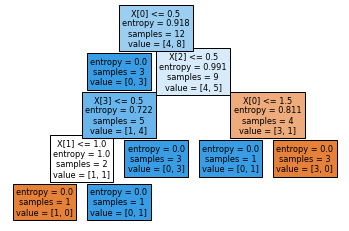

In [ ]:
from sklearn.tree import plot_tree
print(plot_tree(model_entropy,filled=True))


[Text(186.0, 195.696, 'X[0] <= 1.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'), Text(111.60000000000001, 152.208, 'X[1] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'), Text(74.4, 108.72, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'), Text(37.2, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(111.60000000000001, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'), Text(74.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(148.8, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(148.8, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'), Text(260.40000000000003, 152.208, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'), Text(223.20000000000002, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(297.6, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]


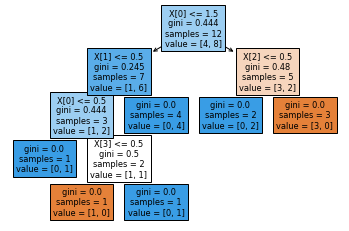

In [ ]:
print(plot_tree(model_gini,filled=True))

Plot the decision surface

No handles with labels found to put in legend.


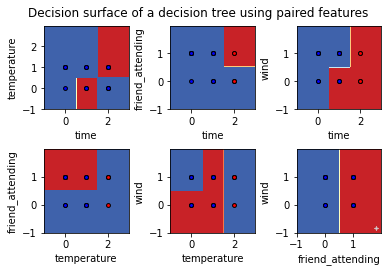

<Figure size 432x288 with 0 Axes>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = fulltraining.iloc[:, pair]
    y = fulltraining.iloc[:,-1]

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(fulltraining.keys()[pair[0]])
    plt.ylabel(fulltraining.keys()[pair[1]])

    plt.scatter(X.iloc[:, 0], y, c=plot_colors[0],cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    plt.scatter(X.iloc[:, 1], y, c=plot_colors[2],cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
plt.show()


<font color='magenta'>**Part 04: Not Compulsory**</font>

Advanced: Can you implement the partitioning of the decision tree using the following algorithm

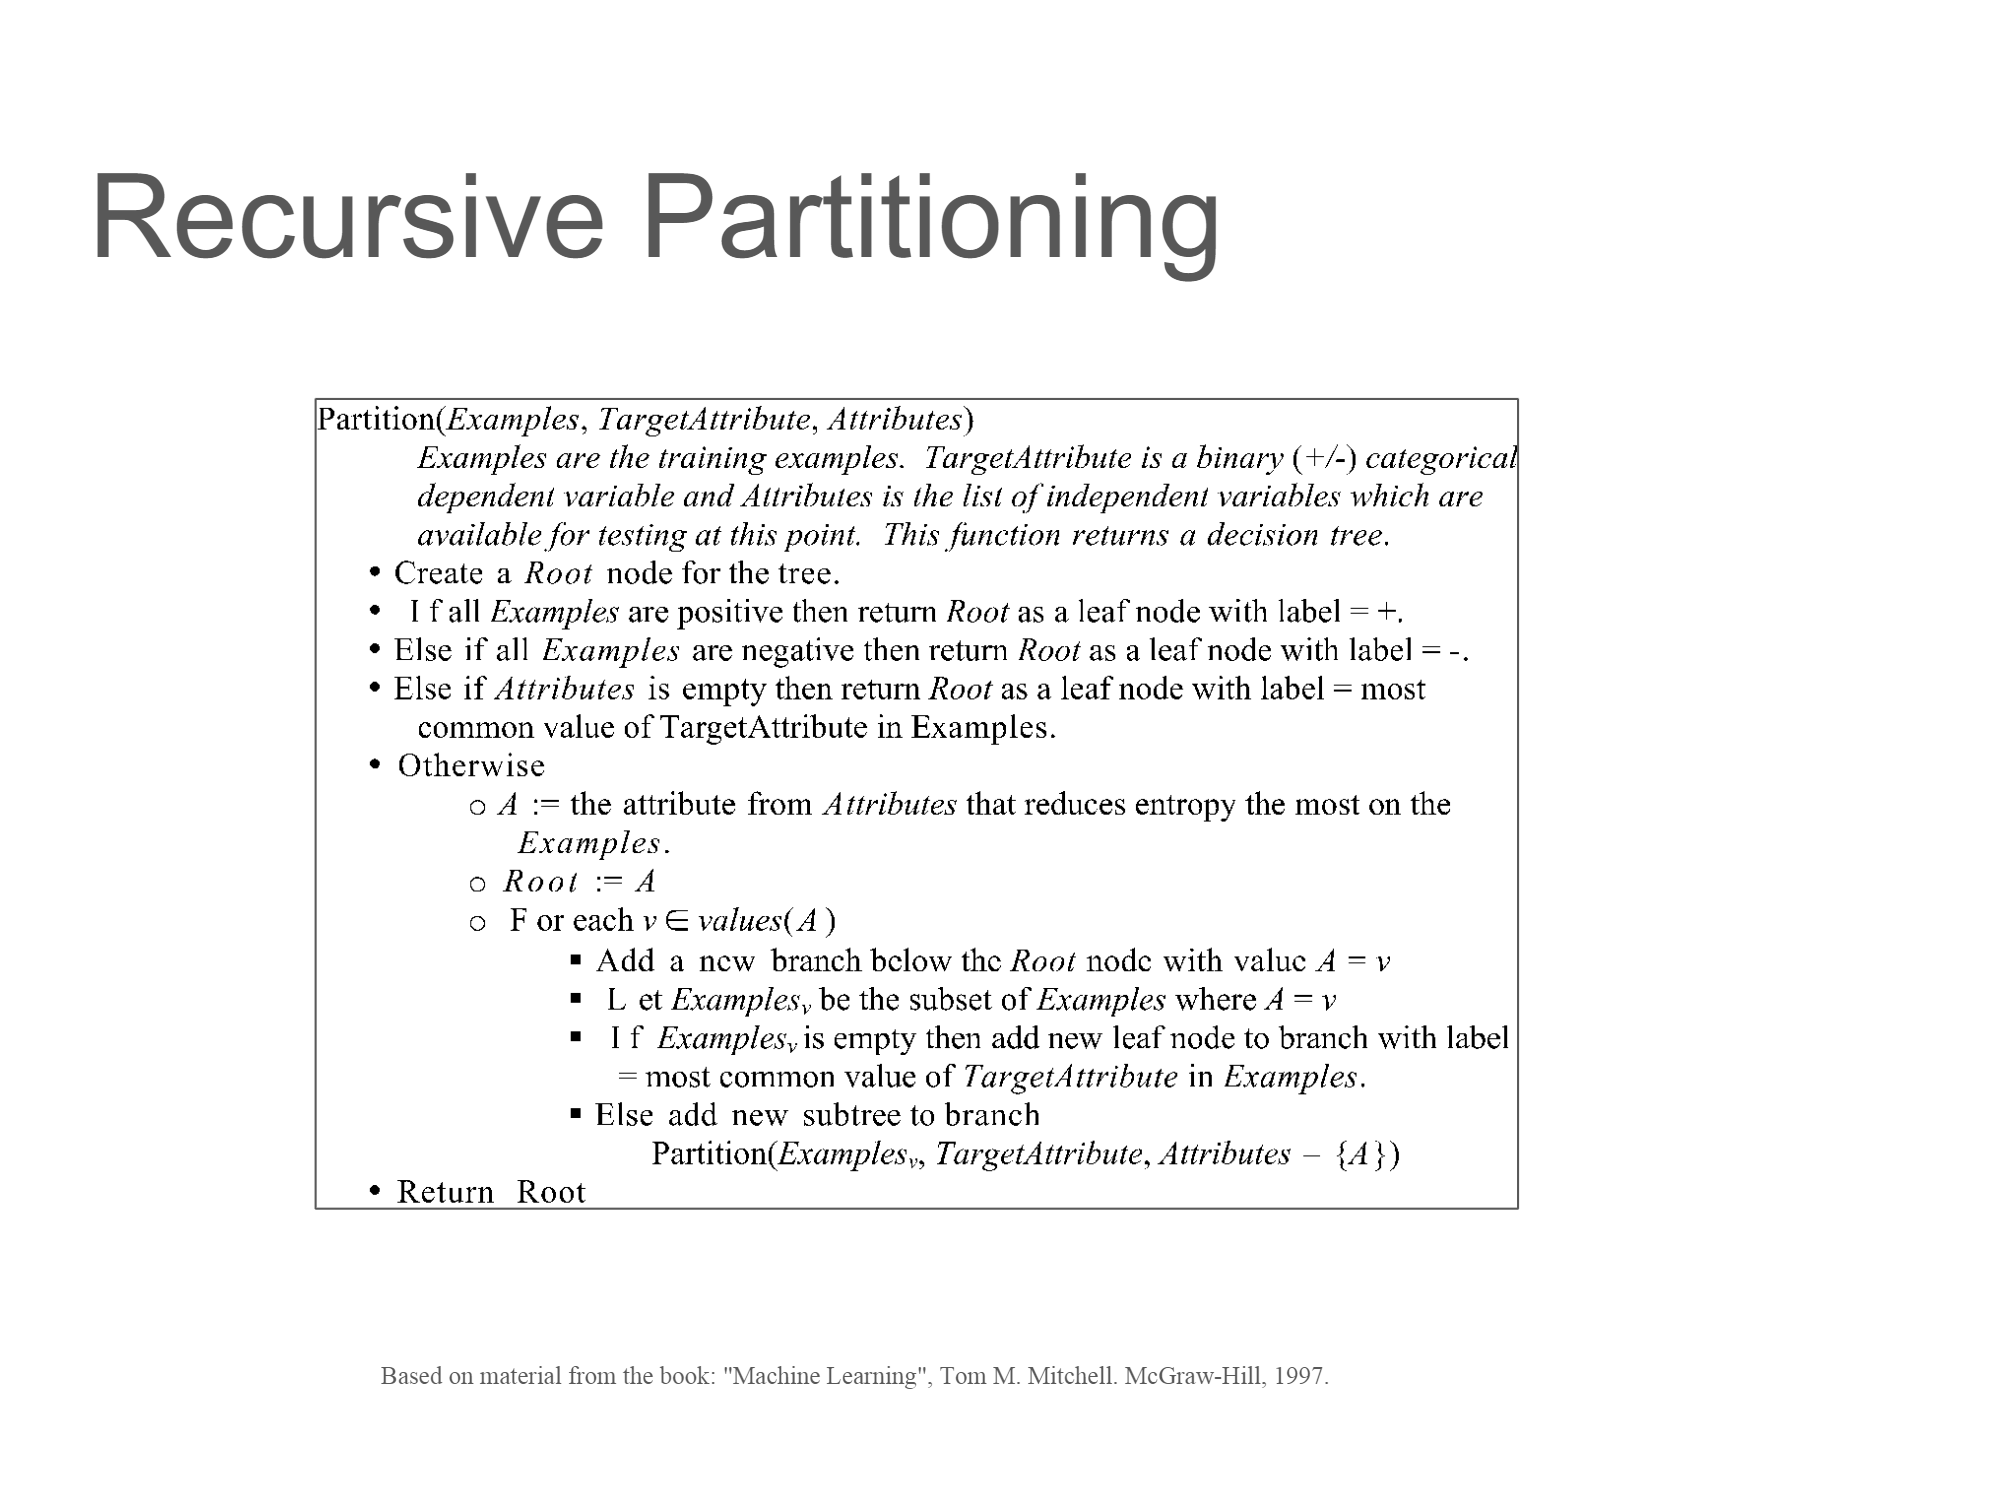

Part 5: Building Decision Trees when the data is of a continuous nature

In the previous case the nodes were broken based on entropy/gini impurity. In the case of regression the mean sqaured error is the decsion parameter for splitting the nodes. The following dataset contains continuous data and we need to use decision trees with regression.

Read the dataset

In [ ]:
import numpy as np
import pandas as pd

que2 = pd.read_csv("sample_data/death.csv")
que2

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8
...,...,...,...,...,...,...,...,...,...,...,...
3136,"Yakutat City and Borough, Alaska<sup>3</sup>",2282,*,*,*,*,*,**,**,**,**
3137,"Yukon-Koyukuk Census Area, Alaska",2290,*,*,*,*,*,**,**,**,**
3138,"Zapata County, Texas",48505,*,*,*,*,*,*,*,*,*
3139,"Zavala County, Texas",48507,*,*,*,*,*,**,**,**,**


Preprocess the dataset to remove all the rows with empty column values

In [ ]:
a = len(que2)
for i in range(a):
  for j in que2.keys():
    if que2.loc[i,j] == "*":
      que2 = que2.drop(i,axis='index')
      break
    if(que2.loc[i,j] == "**"):
      que2 = que2.drop(i,axis='index')
      break
que2 = que2.reset_index(drop=True)
que2

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8
4,"Union County, Florida",12125,No,113.5,89.9,141.4,19,falling,-2.2,-4.3,0
...,...,...,...,...,...,...,...,...,...,...,...
2689,"Los Alamos County, New Mexico",35028,Yes,15.8,9.4,25.4,4,stable,-2.9,-5.8,0
2690,"Eagle County, Colorado",8037,Yes,14.9,8.7,23.6,5,falling,-4.9,-9.3,-0.3
2691,"Utah County, Utah",49049,Yes,12.4,10.7,14.4,37,falling,-2.8,-3.9,-1.8
2692,"McKinley County, New Mexico",35031,Yes,11.6,8,16.2,7,falling,-3.2,-5.7,-0.7


Convert Categorical Values to numerical

In [ ]:
for j in range(len(que2.iloc[:,6])):
  que2.iloc[j,6] = str(int(que2.iloc[j,6].replace(',','')))
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder;
metobj = LabelEncoder()
recenttrend = LabelEncoder()
que2.insert(2,'metobj',metobj.fit_transform(que2['Met Objective of 45.5? (1)']))
que2.insert(8,'recenttrend',metobj.fit_transform(que2['Recent Trend (2)']))
que2 = que2.drop(['Met Objective of 45.5? (1)','Recent Trend (2)'],axis='columns')
que2

,County,FIPS,metobj,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,recenttrend,Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,0,46,45.9,46.1,157376,0,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,0,125.6,108.9,144.2,43,2,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,0,125.3,100.2,155.1,18,2,1.7,0,3.4
3,"Owsley County, Kentucky",21189,0,118.5,83.1,165.5,8,2,2.2,-0.4,4.8
4,"Union County, Florida",12125,0,113.5,89.9,141.4,19,0,-2.2,-4.3,0
...,...,...,...,...,...,...,...,...,...,...,...
2689,"Los Alamos County, New Mexico",35028,1,15.8,9.4,25.4,4,2,-2.9,-5.8,0
2690,"Eagle County, Colorado",8037,1,14.9,8.7,23.6,5,0,-4.9,-9.3,-0.3
2691,"Utah County, Utah",49049,1,12.4,10.7,14.4,37,0,-2.8,-3.9,-1.8
2692,"McKinley County, New Mexico",35031,1,11.6,8,16.2,7,0,-3.2,-5.7,-0.7


cross validation


In [ ]:
#performing cross validation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
estimatemodel = DecisionTreeRegressor()
score = cross_val_score(estimatemodel,que2.iloc[:,1:-1],que2.iloc[:,-1],cv=10)
print(score.mean())

0.7075275532507519


Split the dataset into train and test(Based on split size)

In [ ]:
from sklearn.model_selection import train_test_split
training_set,testing_set = train_test_split(que2,shuffle=True,train_size=2195,test_size=499)
target_set = training_set.iloc[:,-1]
training_set = training_set.iloc[:,1:-1]
target_test_set = testing_set.iloc[:,-1]
testing_set = testing_set.iloc[:,1:-1]
training_set


,FIPS,metobj,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,recenttrend,Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend
2563,55089,1,32.5,27.9,37.7,37,0,-1.3,-2.2
541,26133,0,64.2,52.2,78.3,21,2,-0.2,-1.7
1789,53077,0,47.2,43.3,51.3,113,0,-1.5,-2
1824,13179,0,46.7,36.8,58.1,18,0,-2.4,-4.3
1656,30017,0,48.9,35.2,66.8,9,2,-0.8,-2.9
...,...,...,...,...,...,...,...,...,...
2173,18087,1,41.5,32.5,52.3,15,2,-0.7,-2.4
2391,30047,1,37.4,29.2,47.3,15,0,-1.9,-3.4
1061,39139,0,56.2,51.1,61.6,93,2,-0.4,-1.2
1809,51031,0,47,40.2,54.8,35,2,-0.8,-2.1


Perform the decision tree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# model = linear_model.LinearRegression()
model = DecisionTreeRegressor()
model.fit(training_set,target_set)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Predict on test dataset

In [ ]:
print("the training score is : ",model.score(training_set,target_set))
print("the testing score is : ",model.score(testing_set,target_test_set))

the training score is :  1.0
the testing score is :  0.6355046890987557


Calculate Squared Error between predicted and real values

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true= target_test_set,y_pred = model.predict(testing_set)))
print(mean_squared_error(y_true=target_set,y_pred=model.predict(training_set)))

1.352464929859719
2.3479674401732314e-33




<font color='green'>**References**</font>



*   [Ref1](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

*   [Ref2](https://pbpython.com/categorical-encoding.html)


*   [Ref3](https://mljar.com/blog/visualize-decision-tree/)


*   [Ref4](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)


*   [Ref5](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

*   [Ref6](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

[Text(233.93524354325965, 213.0912, 'X[7] <= 3.85\nmse = 10.82\nsamples = 2195\nvalue = 0.847'), Text(135.00398252724878, 204.3936, 'X[6] <= 0.5\nmse = 2.675\nsamples = 2182\nvalue = 0.665'), Text(39.93712546305091, 195.696, 'X[7] <= -2.65\nmse = 0.852\nsamples = 714\nvalue = -0.971'), Text(9.235779825227965, 186.9984, 'X[7] <= -13.8\nmse = 1.502\nsamples = 179\nvalue = -1.894'), Text(2.137021276595745, 178.3008, 'X[5] <= 29.5\nmse = 5.672\nsamples = 4\nvalue = -6.95'), Text(1.729969604863222, 169.60320000000002, 'X[0] <= 40515.0\nmse = 1.21\nsamples = 2\nvalue = -9.2'), Text(1.5264437689969605, 160.9056, 'mse = 0.0\nsamples = 1\nvalue = -10.3'), Text(1.9334954407294833, 160.9056, 'mse = 0.0\nsamples = 1\nvalue = -8.1'), Text(2.544072948328268, 169.60320000000002, 'X[2] <= 49.0\nmse = 0.01\nsamples = 2\nvalue = -4.7'), Text(2.3405471124620063, 160.9056, 'mse = 0.0\nsamples = 1\nvalue = -4.8'), Text(2.747598784194529, 160.9056, 'mse = 0.0\nsamples = 1\nvalue = -4.6'), Text(16.3345383738

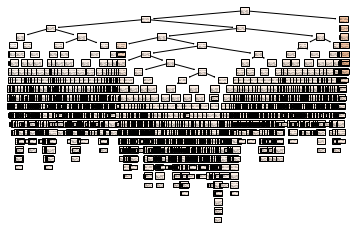

In [ ]:
from sklearn.tree import plot_tree
print(plot_tree(model,filled= True))


In [ ]:
from sklearn.tree import export_text
print(export_text(model))

|--- feature_7 <= 3.85
|   |--- feature_6 <= 0.50
|   |   |--- feature_7 <= -2.65
|   |   |   |--- feature_7 <= -13.80
|   |   |   |   |--- feature_5 <= 29.50
|   |   |   |   |   |--- feature_0 <= 40515.00
|   |   |   |   |   |   |--- value: [-10.30]
|   |   |   |   |   |--- feature_0 >  40515.00
|   |   |   |   |   |   |--- value: [-8.10]
|   |   |   |   |--- feature_5 >  29.50
|   |   |   |   |   |--- feature_2 <= 49.00
|   |   |   |   |   |   |--- value: [-4.80]
|   |   |   |   |   |--- feature_2 >  49.00
|   |   |   |   |   |   |--- value: [-4.60]
|   |   |   |--- feature_7 >  -13.80
|   |   |   |   |--- feature_5 <= 76.50
|   |   |   |   |   |--- feature_7 <= -5.15
|   |   |   |   |   |   |--- feature_4 <= 51.15
|   |   |   |   |   |   |   |--- feature_4 <= 32.85
|   |   |   |   |   |   |   |   |--- value: [-0.30]
|   |   |   |   |   |   |   |--- feature_4 >  32.85
|   |   |   |   |   |   |   |   |--- feature_8 <= -16.45
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 27.60


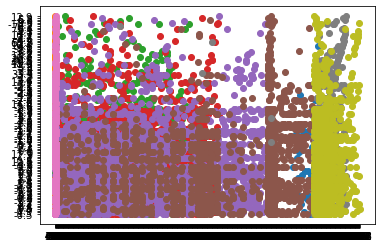

In [ ]:
import matplotlib.pyplot as plt
for i in training_set.keys():
  plt.scatter(training_set.loc[:,i],target_set)